# Gauss-Otsu-labeling
A simple and efficiant approach to segmenting images is using filters such as Gaussian blurring, threshold algorithms such as Otsu's method and labelling objects using connected component analysis. 

The combination of these three algorithms is so common, that there are convenience functions available to execute those three operations in one shot. One limitation shall be mentioned: This algorithm does not work well in case objects are very densely packed.

In [1]:
from skimage.io import imread
from stackview import imshow
import napari_segment_blobs_and_things_with_membranes as nsbatwm

To demonstrate the workflow, we're using image data from the [Broad Bio Image Challenge](https://bbbc.broadinstitute.org/BBBC022):
We used image set BBBC022v1 [Gustafsdottir et al., PLOS ONE, 2013](http://dx.doi.org/10.1371/journal.pone.0080999), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

We load the image and for visualisation purposes we crop out a region:

c:\structure\code\stackview\stackview\_imshow.py:55: UserWarning: The parameter cmap is deprecated, use colormap instead.
  warnings.warn("The parameter cmap is deprecated, use colormap instead.")


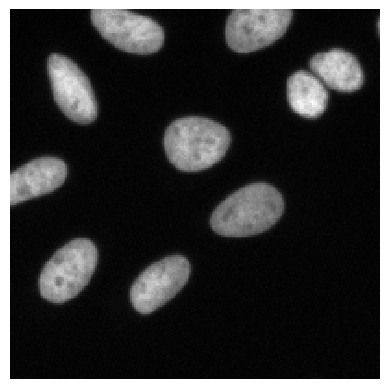

In [2]:
input_image = imread("data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

cropped_image = input_image[0:200, 200:400]

imshow(cropped_image, cmap='Greys_r')

A common workflow consists of these three steps:

## 1) Blurring the image using a Gaussian blur


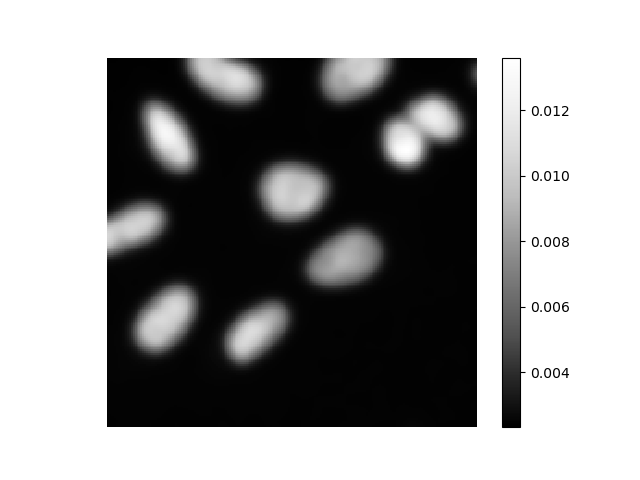
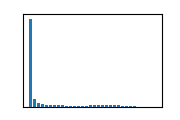

nsbatwm made made image 
 
 shape (200, 200) 
 dtype float64 
 size 312.5 kB 
 min 0.0023298292222141926 max 0.013610139174849685
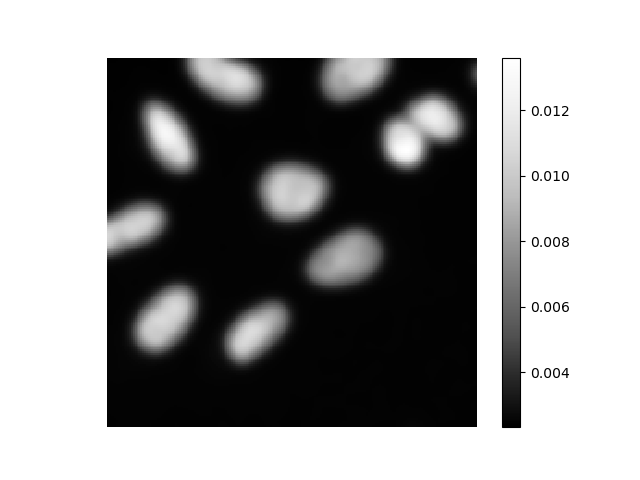
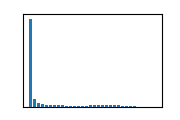

In [3]:
blurred_image = nsbatwm.gaussian_blur(cropped_image, sigma=3)

blurred_image

## 2) Otsu's Thresholding method


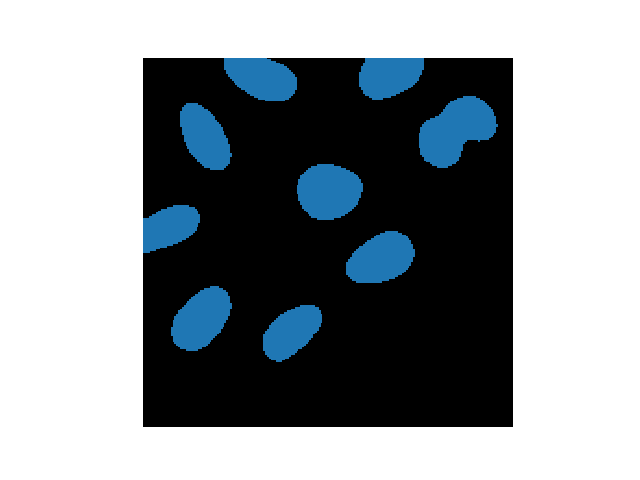

nsbatwm made made image 
 
 shape (200, 200) 
 dtype int32 
 size 156.2 kB 
 min 0 max 1 n labels 1
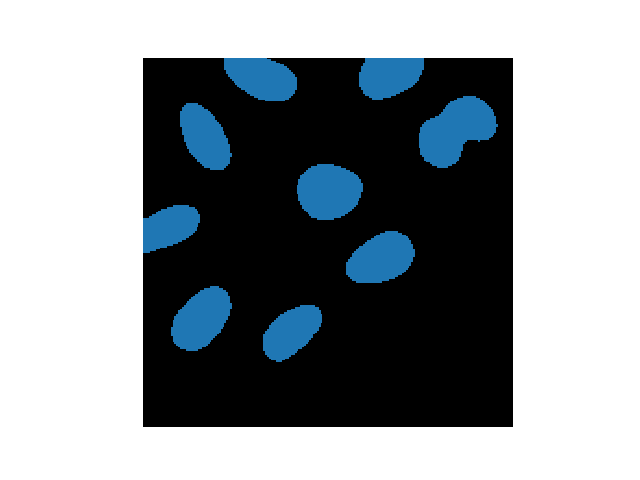

In [4]:
binary_image = nsbatwm.threshold_otsu(blurred_image)

binary_image

## 3) Connected component labeling


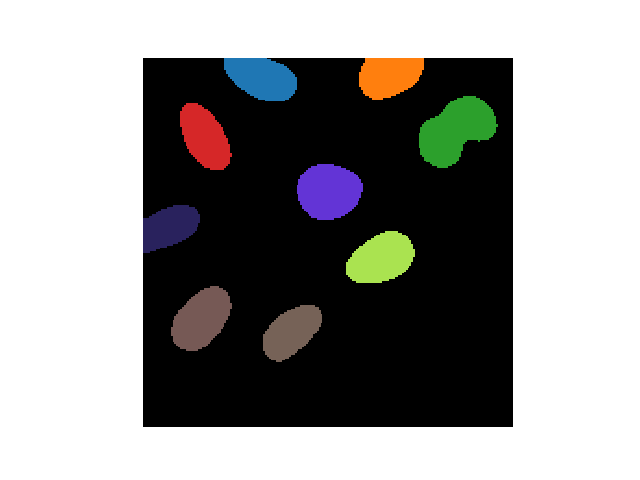

nsbatwm made made image 
 
 shape (200, 200) 
 dtype int64 
 size 312.5 kB 
 min 0 max 9 n labels 9
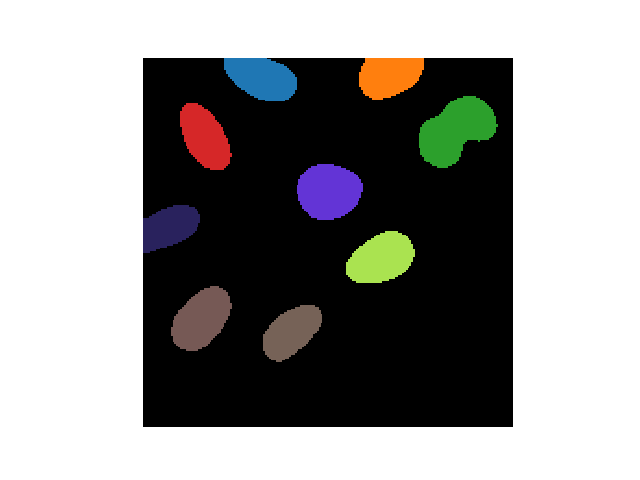

In [5]:
label_image = nsbatwm.connected_component_labeling(binary_image)

label_image

## Short-cut: Gauss-Otsu-Labeling
Gauss-Otsu-labeling is a command in the scriptable napari plugin [napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes) and also the [pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/) library. The operation has a `outline_sigma` parameter for controlling how precise segmented objects are outlined. Its purpose is identical with the `sigma` parameter used with the Gaussian blur above.


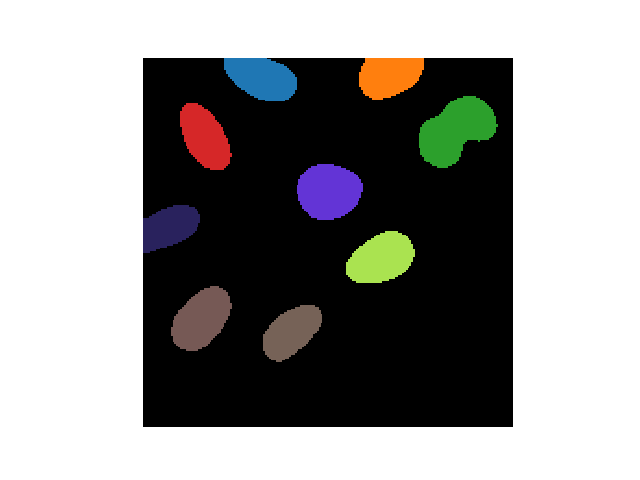

nsbatwm made made image 
 
 shape (200, 200) 
 dtype int32 
 size 156.2 kB 
 min 0 max 9 n labels 9
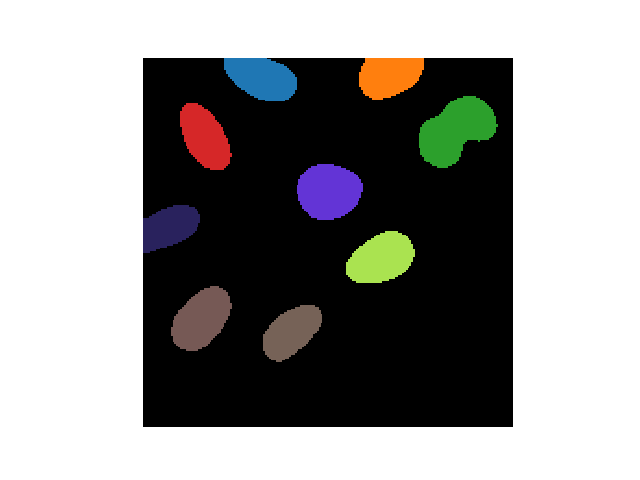

In [6]:
labels_image_2 = nsbatwm.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=3)

labels_image_2

Now that we have this shortcut function, we can easily modify the sigma and see how different values modify the segmentation result.


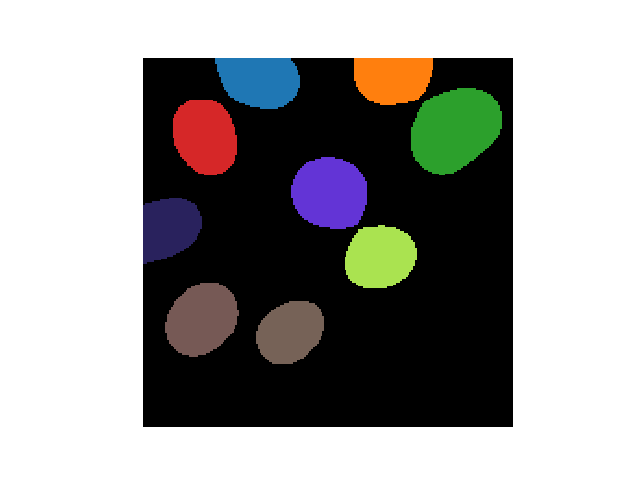

nsbatwm made made image 
 
 shape (200, 200) 
 dtype int32 
 size 156.2 kB 
 min 0 max 9 n labels 9
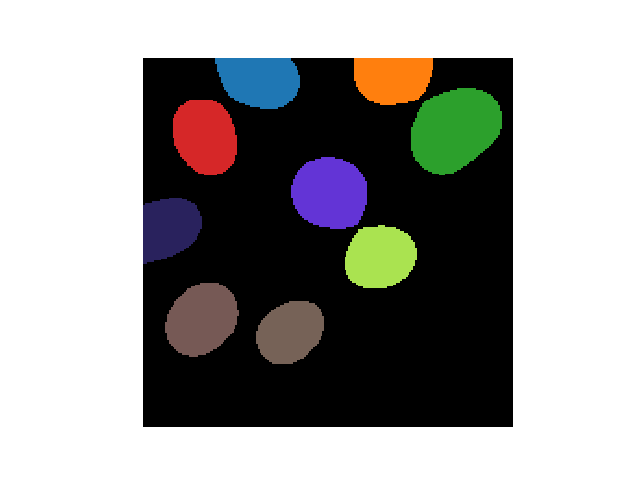

In [7]:
labels_image_3 = nsbatwm.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=10)

labels_image_3


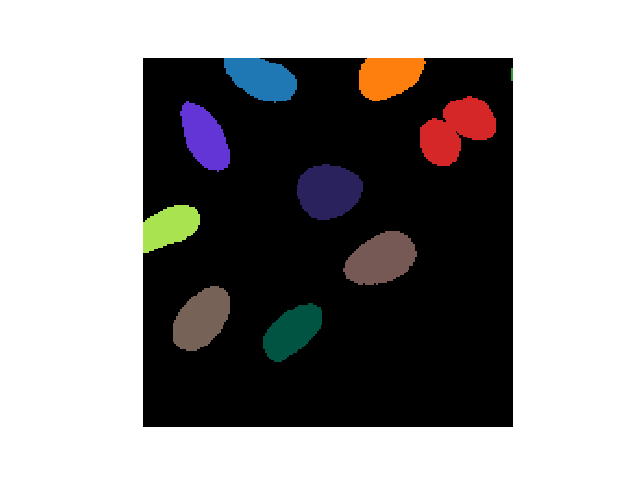

nsbatwm made made image 
 
 shape (200, 200) 
 dtype int32 
 size 156.2 kB 
 min 0 max 10 n labels 10
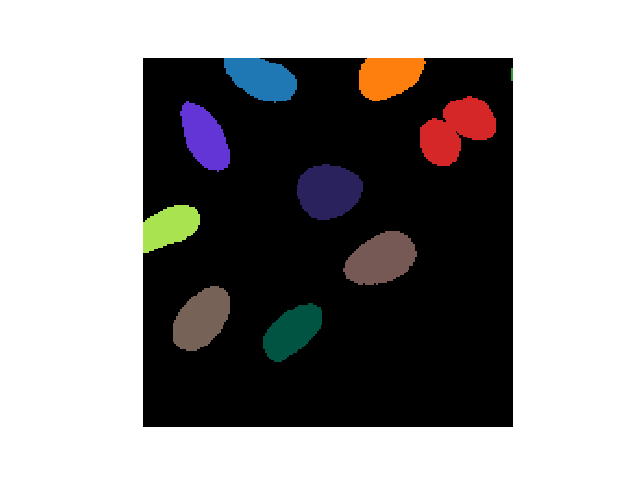

In [8]:
labels_image_4 = nsbatwm.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=0)

labels_image_4

## Other implementations
The same function is available in the [pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/) library.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
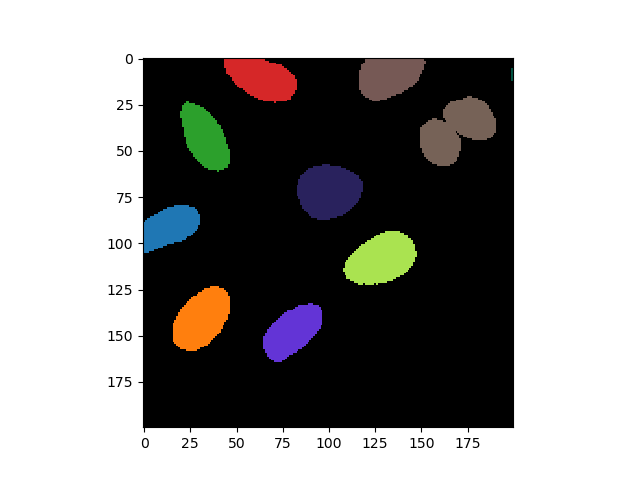

In [9]:
import pyclesperanto_prototype as cle

labels_image_5 = cle.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=0)

labels_image_5

## Exercise
Be a brave scientist and check if the segmentation results using `nsbatwm.gauss_otsu_labeling()` and `cle.gauss_otsu_labeling()` are the same. If not, visualize the differences.

Hint: You can compare the images in multiple ways:
* Check if both have the same number of nuclei detected.
* Check if the label images are equal.
* Consider comparing binary images as well, e.g. by subtracting them from each other.